In [1]:
%cd ~/NetBeansProjects/ExpLosion/
%load_ext autoreload
from notebooks.common_imports import *
from gui.output_utils import *

/Volumes/LocalDataHD/m/mm/mmb28/NetBeansProjects/ExpLosion


# labelled size and domain- w2v @ gigaw 100 vs wiki 15 vs wiki 100

In [3]:
s = {'document_features_ev': 'SVO',
    'document_features_tr': 'J+N+V+SVO',
    'expansions__allow_overlap': 0, 
    'expansions__decode_handler': 'SignifiedOnlyFeatureHandler',
    'expansions__entries_of_id': None,
    'expansions__k': 3,
    'expansions__neighbour_strategy': 'linear',
    'expansions__noise': 0.0,
    'expansions__use_random_neighbours': 0,
    'expansions__use_similarity': 0,
    'expansions__vectors__algorithm__in': ['word2vec'],
    'expansions__vectors__composer__in': ['Verb', 'CopyObj', 'Add', 'Mult', 'Left', 'Right'], 
    'expansions__vectors__dimensionality': 100,
    'expansions__vectors__rep': 0,
    'expansions__vectors__unlabelled_percentage__in': [15, 100],
    'labelled': 'amazon_grouped-tagged'}
ids = Experiment.objects.filter(**s).values_list('id', flat=True)
print(ids, 'total', len(ids))

[250, 251, 252, 255, 256, 257, 260, 261, 262, 265, 266, 267] total 12


Calculating CI for exp 250
Calculating CI for exp 251
Calculating CI for exp 252
Calculating CI for exp 255
Calculating CI for exp 256
Calculating CI for exp 257
Calculating CI for exp 260
Calculating CI for exp 261
Calculating CI for exp 262
Calculating CI for exp 265
Calculating CI for exp 266
Calculating CI for exp 267
Composer has 6000 values
folds has 6000 values
unlab has 6000 values
Accuracy has 6000 values
algo has 6000 values
percent has 6000 values
/mnt/lustre/scratch/inf/mmb28/FeatureExtractionToolkit/word2vec_vectors/composed/AN_NN_word2vec-wiki_100percent-rep0_Add.events.filtered.strings
/mnt/lustre/scratch/inf/mmb28/FeatureExtractionToolkit/word2vec_vectors/composed/AN_NN_word2vec-gigaw_100percent-rep0_Add.events.filtered.strings
/mnt/lustre/scratch/inf/mmb28/FeatureExtractionToolkit/word2vec_vectors/composed/AN_NN_word2vec-wiki_15percent-rep0_Add.events.filtered.strings
/mnt/lustre/scratch/inf/mmb28/FeatureExtractionToolkit/word2vec_vectors/composed/AN_NN_word2vec-wiki_1

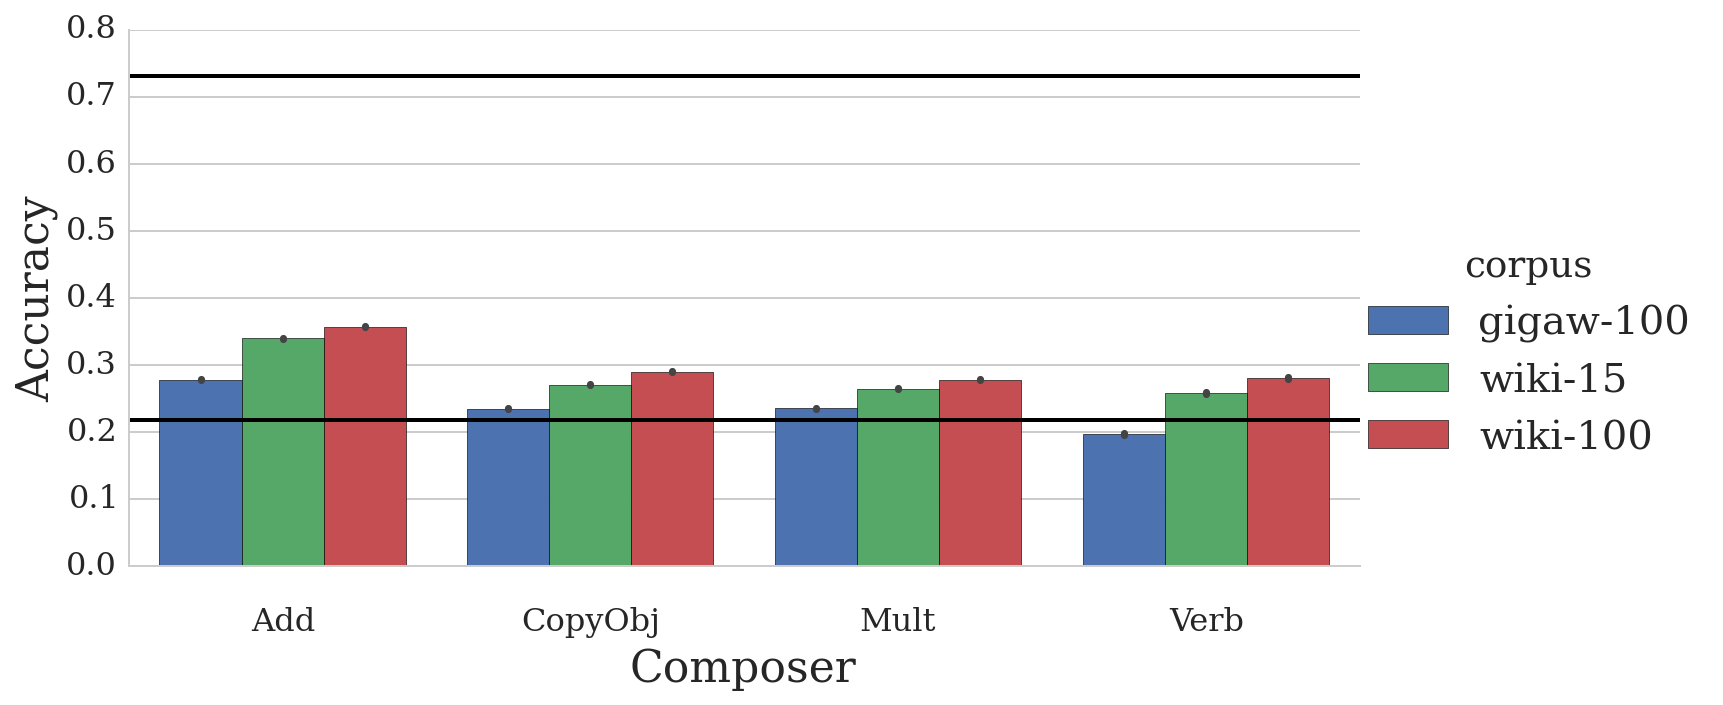

In [4]:
fields = {  'unlab': 'expansions__vectors__unlabelled',
            'algo': 'expansions__vectors__algorithm',
            'Composer': 'expansions__vectors__composer',
             'percent': 'expansions__vectors__unlabelled_percentage'}
df = dataframe_from_exp_ids(ids, fields)
df['corpus'] = ['%s-%s'%(a,b) for a,b in zip(df.unlab, df.percent)]
df.drop(['unlab', 'percent'], axis=1, inplace=True)

g= sns.factorplot(y='Accuracy', x='Composer', hue='corpus',# col='unlab', 
                  hue_order=sort_df_by(df, 'corpus'), aspect=2,
                   data=df, kind='bar');

for ax in g.axes.flat:
    ax.axhline(random_vect_baseline(), c='k');
    ax.axhline(nondistributional_baseline(**settings_of(ids[0])), c='k')

plt.savefig('plot-vps-corpus-size.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

for i in ids:
    print(Experiment.objects.get(id=i).expansions.vectors.path)

# w2v vs glove vs count @ wiki 100

[248, 249, 250, 253, 254, 255, 258, 259, 260, 263, 264, 265] total 12
Calculating CI for exp 248
Calculating CI for exp 249
Calculating CI for exp 253
Calculating CI for exp 254
Calculating CI for exp 258
Calculating CI for exp 259
Calculating CI for exp 263
Calculating CI for exp 264
algo has 6000 values
folds has 6000 values
Composer has 6000 values
Accuracy has 6000 values


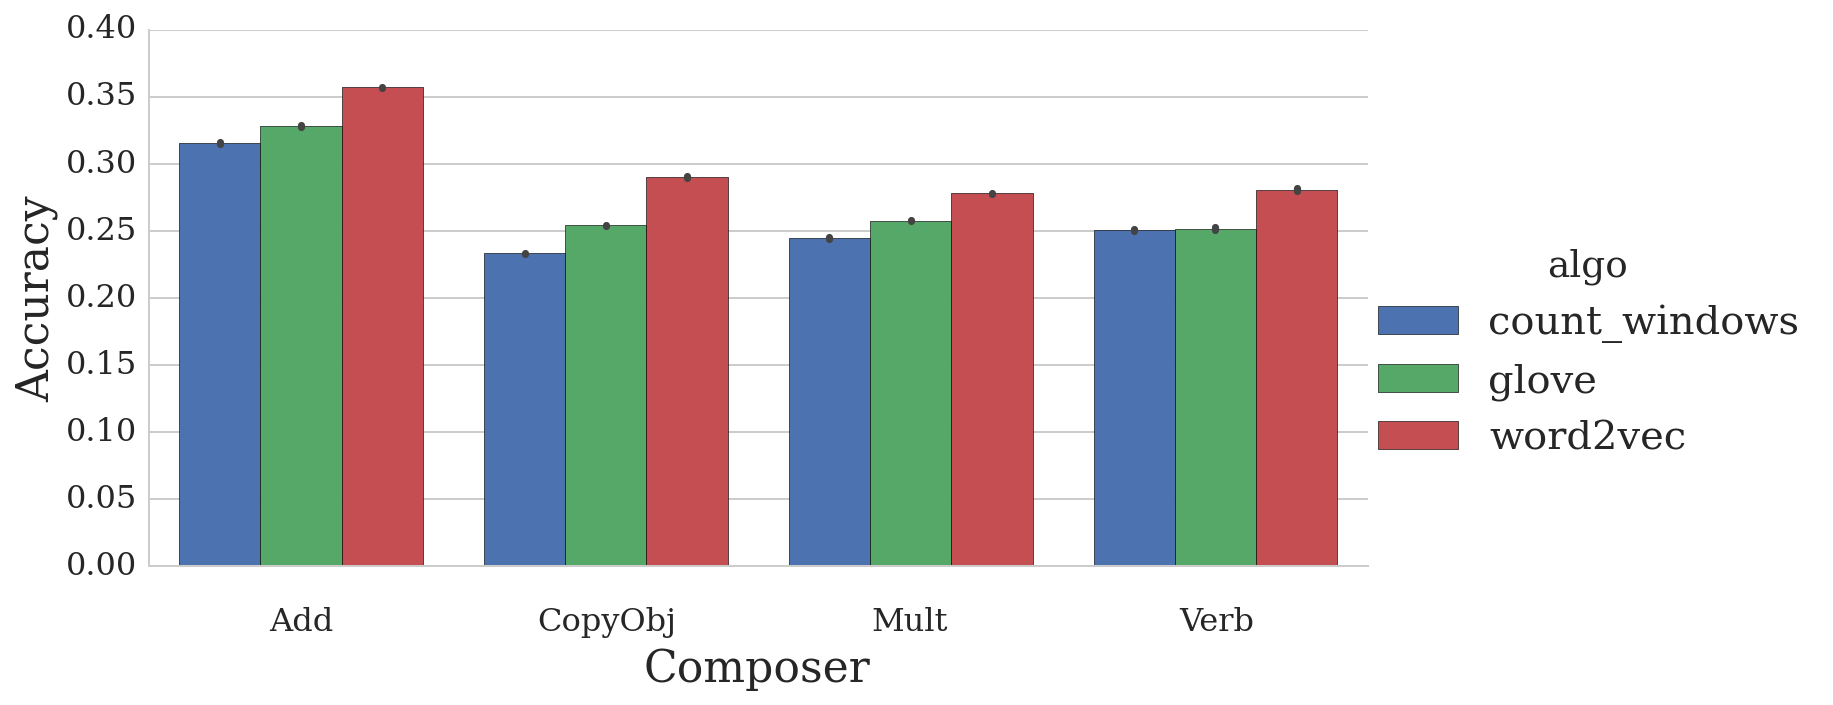

In [5]:
s['expansions__vectors__algorithm__in'] = ['word2vec', 'glove', 'count_windows']
s['expansions__vectors__composer__in'] = ['Verb', 'CopyObj', 'Add', 'Mult', 'Left', 'Right']
s['expansions__vectors__unlabelled'] = 'wiki'
s['expansions__vectors__unlabelled_percentage__in'] = [100]
ids = Experiment.objects.filter(**s).values_list('id', flat=True)
print(ids, 'total', len(ids))

fields = {'algo': 'expansions__vectors__algorithm',
          'Composer': 'expansions__vectors__composer'
}
df = dataframe_from_exp_ids(ids, fields, abbreviate=False)
g= sns.factorplot(y='Accuracy', x='Composer', hue='algo', 
                   data=df, kind='bar', aspect=2);
plt.savefig('plot-vps-algorithm.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)